In [91]:
import pandas as pd
import numpy as np

In [217]:
#gene presence-absence matrix reconstructed by treewas
snp_rec = pd.read_csv('data/treewas1_gene_rec.txt', sep='\t')
snp_rec = snp_rec.astype(int)
snp_rec.head()

,hmbR,igr_NEIS0405_0406,igr_up_NEIS1364,igr_up_NEIS1969,NadA_peptide,NEIS0023,NEIS0024,NEIS0025,NEIS0027,NEIS0028,...,NEISp1468,NEISp2020,NEISp2198,NG.MAST_porB,NG.MAST_tbpB,penA,X.porA,X.porB,tRNA.cys,tRNA.fmet
642,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
662,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
665,1,1,1,1,1,1,1,0,1,1,...,1,1,0,0,0,1,1,1,1,1
666,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
667,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1


In [218]:
#phenotype states reconstructed by treewas
ph_rec = pd.read_csv('data/treewas1_phen_rec.txt', sep='\t')
ph_rec.head()

,x
642,1.0
662,1.0
665,0.0
666,0.0
667,0.0


In [219]:
#tree's branches list
tree = pd.read_csv('data/treewas1_tree_branches.txt', sep='\t')
tree.head()

,V1,V2
0,257,108
1,257,48
2,243,123
3,243,51
4,138,21


In [220]:
#count simultaneous score
simscores = {}
for i in range(len(snp_rec.columns)):
    v1 = np.array(snp_rec.iloc[list(tree.V1 - 1),i]) - np.array(snp_rec.iloc[list(tree.V2 - 1),i])
    v2 = np.array(ph_rec.iloc[list(tree.V1 - 1),0]) - np.array(ph_rec.iloc[list(tree.V2 - 1),0])
    simscore = v1 * v2
    final_simscore = simscore.sum()
    simscores[snp_rec.columns[i]] = final_simscore
#print(simscores)

In [221]:
#writing simscores to file
out = open('simscores_counted_1.tsv', 'w')
out.write('\tsimscore\n')
for g in simscores:
    out.write(g + '\t' + str(simscores[g]) + '\n')
out.close()

In [222]:
#comparison with treewas simscores
treewas_scores = pd.read_csv('data/treewas1_simscore.txt', sep='\t')
my_scores = pd.read_csv('simscores_counted_1.tsv', sep = '\t', index_col = 0)
my_scores.join(treewas_scores, how = 'outer')

,simscore,x
hmbR,0.0,0.0
igr_NEIS0405_0406,0.0,0.0
igr_up_NEIS1364,0.0,0.0
igr_up_NEIS1969,0.0,0.0
NadA_peptide,0.0,0.0
NEIS0023,1.5,1.5
NEIS0024,0.5,0.5
NEIS0025,1.5,1.5
NEIS0027,0.5,0.5
NEIS0028,0.5,0.5


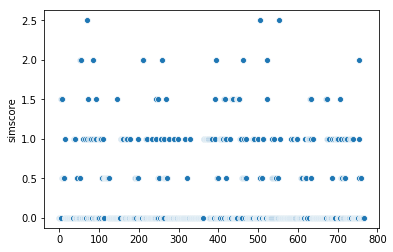

In [223]:
#plot building
import seaborn as sns
sns.scatterplot(range(len(my_scores.index)),abs(my_scores.simscore))
